In [ ]:
# Practical 1: Write a program to calculate Fibonacci numbers and find its step count.
def fibonacci(n):
    step_count = 0
    if n == 0:
        return 0, step_count
    elif n == 1:
        return 1, step_count

    a, b = 0, 1
    step_count += 2

    for i in range(2, n + 1):
        a, b = b, a + b
        step_count += 1

    return b, step_count

n = int(input("Enter the Fibonacci term you want to find: "))
fib_number, steps = fibonacci(n)
print(f"Fibonacci number at position {n} is {fib_number}")
print(f"Total steps taken: {steps}")

Fibonacci number at position 10 is 55
Total steps taken: 29


In [ ]:
# Practical 2: Implement job sequencing with deadlines using a greedy method.
class Job:
    def __init__(self, job_id, deadline, profit):
        self.job_id = job_id
        self.deadline = deadline
        self.profit = profit

def job_sequencing(jobs, max_deadline):
    jobs.sort(key=lambda x: x.profit, reverse=True)
    result = [-1] * max_deadline
    total_profit = 0
    job_sequence = []

    for job in jobs:
        for slot in range(min(job.deadline, max_deadline) - 1, -1, -1):
            if result[slot] == -1:
                result[slot] = job.job_id
                total_profit += job.profit
                job_sequence.append(job.job_id)
                break

    return job_sequence, total_profit

jobs = [
    Job('J1', 2, 100),
    Job('J2', 1, 19),
    Job('J3', 2, 27),
    Job('J4', 1, 25),
    Job('J5', 3, 15)
]

max_deadline = max(job.deadline for job in jobs)
job_sequence, total_profit = job_sequencing(jobs, max_deadline)

print("Job sequence to maximize profit:", job_sequence)
print("Total profit:", total_profit)

Job sequence: ['Job1', 'Job3', 'Job5']
Total profit: 142


In [ ]:
# Practical 3: Write a program to solve a fractional Knapsack problem using a greedy method.
class Item:
    def __init__(self, value, weight):
        self.value = value
        self.weight = weight

def fractional_knapsack(capacity, items):
    items.sort(key=lambda x: x.value / x.weight, reverse=True)
    total_value = 0

    for item in items:
        if capacity - item.weight >= 0:
            capacity -= item.weight
            total_value += item.value
        else:
            total_value += item.value * (capacity / item.weight)
            break

    return total_value

if __name__ == "__main__":
    items = [Item(60, 10), Item(100, 20), Item(120, 30)]
    capacity = 50
    max_value = fractional_knapsack(capacity, items)
    print(f"Maximum value in the knapsack: {max_value:.2f}")

Maximum value in the knapsack: 240.00


In [ ]:
# Practical 4: Write a program to solve a 0-1 Knapsack problem using dynamic programming or branch and bound strategy.

# Code: 0-1 Knapsack using Dynamic Programming
def knapsack_dp(values, weights, capacity):
    n = len(values)
    dp = [[0 for x in range(capacity + 1)] for y in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(values[i - 1] + dp[i - 1][w - weights[i - 1]], dp[i - 1][w])
            else:
                dp[i][w] = dp[i - 1][w]

    return dp[n][capacity]

if __name__ == "__main__":
    values = [60, 100, 120]
    weights = [10, 20, 30]
    capacity = 50
    max_value = knapsack_dp(values, weights, capacity)
    print(f"Maximum value in the knapsack: {max_value}")

Maximum value in the knapsack: 220


In [ ]:
# Code: 0-1 Knapsack using Branch and Bound
class Item:
    def __init__(self, value, weight):
        self.value = value
        self.weight = weight
        self.ratio = value / weight

class Node:
    def __init__(self, level, profit, weight, bound):
        self.level = level
        self.profit = profit
        self.weight = weight
        self.bound = bound

def bound(node, n, capacity, items):
    if node.weight >= capacity:
        return 0
    profit_bound = node.profit
    j = node.level + 1
    total_weight = node.weight

    while j < n and total_weight + items[j].weight <= capacity:
        total_weight += items[j].weight
        profit_bound += items[j].value
        j += 1

    if j < n:
        profit_bound += (capacity - total_weight) * items[j].ratio

    return profit_bound

def knapsack_branch_and_bound(capacity, items, n):
    items.sort(key=lambda x: x.ratio, reverse=True)
    queue = []
    u = Node(-1, 0, 0, 0)
    u.bound = bound(u, n, capacity, items)
    max_profit = 0
    queue.append(u)

    while queue:
        u = queue.pop(0)
        if u.level == -1:
            v = Node(0, 0, 0, 0)
        if u.level == n - 1:
            continue

        v = Node(u.level + 1, u.profit + items[v.level].value, u.weight + items[v.level].weight, 0)

        if v.weight <= capacity and v.profit > max_profit:
            max_profit = v.profit

        v.bound = bound(v, n, capacity, items)
        if v.bound > max_profit:
            queue.append(v)

        v = Node(u.level + 1, u.profit, u.weight, 0)
        v.bound = bound(v, n, capacity, items)
        if v.bound > max_profit:
            queue.append(v)

    return max_profit

values = [60, 100, 120]
weights = [10, 20, 30]
capacity = 50
items = [Item(values[i], weights[i]) for i in range(len(values))]
n = len(items)

max_profit = knapsack_branch_and_bound(capacity, items, n)
print(f"Maximum profit in the knapsack: {max_profit}")

Maximum profit in the knapsack: 220


In [ ]:
# 5. Mini Project
import time
import random
from threading import Thread

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

def threaded_merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        left_thread = Thread(target=merge_sort, args=(L,))
        right_thread = Thread(target=merge_sort, args=(R,))

        left_thread.start()
        right_thread.start()

        left_thread.join()
        right_thread.join()

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

def measure_time(sort_function, arr):
    start_time = time.time()
    sort_function(arr)
    end_time = time.time()
    return end_time - start_time

def compare_merge_sort_algorithms():
    arr_size = 10000
    best_case = list(range(arr_size))
    worst_case = list(range(arr_size, 0, -1))

    print("Testing Single-threaded Merge Sort:")
    best_time_single = measure_time(merge_sort, best_case.copy())
    worst_time_single = measure_time(merge_sort, worst_case.copy())
    print(f"Best case time (Single-threaded): {best_time_single:.6f} seconds")
    print(f"Worst case time (Single-threaded): {worst_time_single:.6f} seconds")

    print("\nTesting Multithreaded Merge Sort:")
    best_time_multi = measure_time(threaded_merge_sort, best_case.copy())
    worst_time_multi = measure_time(threaded_merge_sort, worst_case.copy())
    print(f"Best case time (Multithreaded): {best_time_multi:.6f} seconds")
    print(f"Worst case time (Multithreaded): {worst_time_multi:.6f} seconds")

if __name__ == "__main__":
    compare_merge_sort_algorithms()

Testing Single-threaded Merge Sort:
Best case time (Single-threaded): 0.020578 seconds
Worst case time (Single-threaded): 0.024097 seconds

Testing Multithreaded Merge Sort:
Best case time (Multithreaded): 0.024124 seconds
Worst case time (Multithreaded): 0.023096 seconds


In [52]:
#BELOW THIS ML PRACTICALS

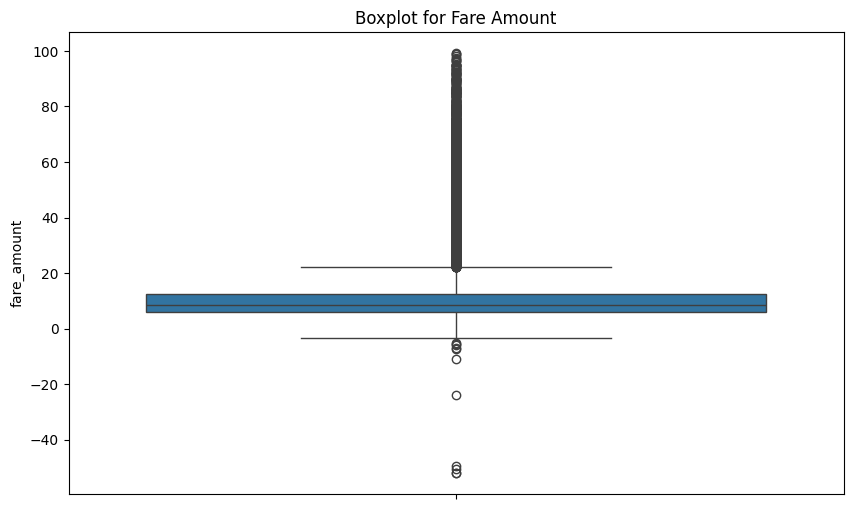

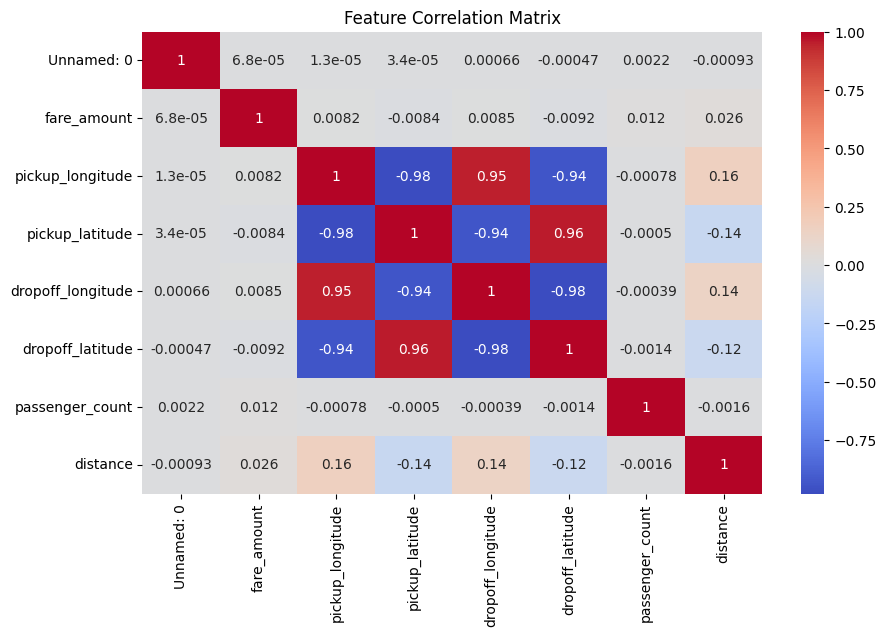

Linear Regression RMSE: 9.477887916406992
Linear Regression R2 Score: 0.0005721642287701556
Random Forest Regression RMSE: 5.257595413698685
Random Forest Regression R2 Score: 0.6924592777821024


In [ ]:
# Practical 6: Predict the price of the Uber ride from a given pickup point to the agreed drop-off location
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r"C:/Users/abc/Downloads/archive/uber.csv")

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df.dropna(subset=['pickup_datetime'], inplace=True)
df = df.dropna()

df = df[(df['pickup_latitude'] >= -90) & (df['pickup_latitude'] <= 90)]
df = df[(df['pickup_longitude'] >= -180) & (df['pickup_longitude'] <= 180)]
df = df[(df['dropoff_latitude'] >= -90) & (df['dropoff_latitude'] <= 90)]
df = df[(df['dropoff_longitude'] >= -180) & (df['dropoff_longitude'] <= 180)]

def calculate_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup, dropoff).kilometers

df['distance'] = df.apply(calculate_distance, axis=1)

df = df[df['fare_amount'] < 100]

plt.figure(figsize=(10, 6))
sns.boxplot(df['fare_amount'])
plt.title('Boxplot for Fare Amount')
plt.show()

numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

X = df[['distance', 'passenger_count']]
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R2 Score:", r2_lr)
print("Random Forest Regression RMSE:", rmse_rf)
print("Random Forest Regression R2 Score:", r2_rf)


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

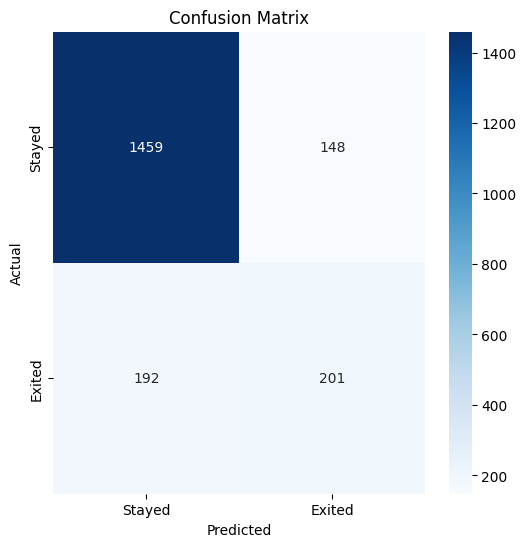

In [ ]:
# Practical 7 : Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:/Users/abc/Downloads/archive/Churn_Modelling.csv")

print(df.head())

X = df.drop(columns=['Exited', 'CustomerId', 'Surname']) 
y = df['Exited']

label_encoder = LabelEncoder()

X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['Geography'] = label_encoder.fit_transform(X['Geography'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, activation='relu', solver='adam', random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Stayed', 'Exited'], yticklabels=['Stayed', 'Exited'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [1]:
# Practical 8 : Implement K-Nearest Neighbors algorithm on diabetes.csv dataset.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load the dataset
df = pd.read_csv(r"C:/Users/abc/Downloads/archive/diabetes.csv")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:\n", df.isnull().sum())

# Separate features and target variable
X = df.drop("Outcome", axis=1)  
y = df["Outcome"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate performance metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display the results
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  

Missing values in the dataset:
 Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

Confusion Matrix:
[[79 20]
 [27 28]]
Accuracy: 0.6948
Error Rate: 0.3052
Precision: 0.5833
Recall: 0.5091


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

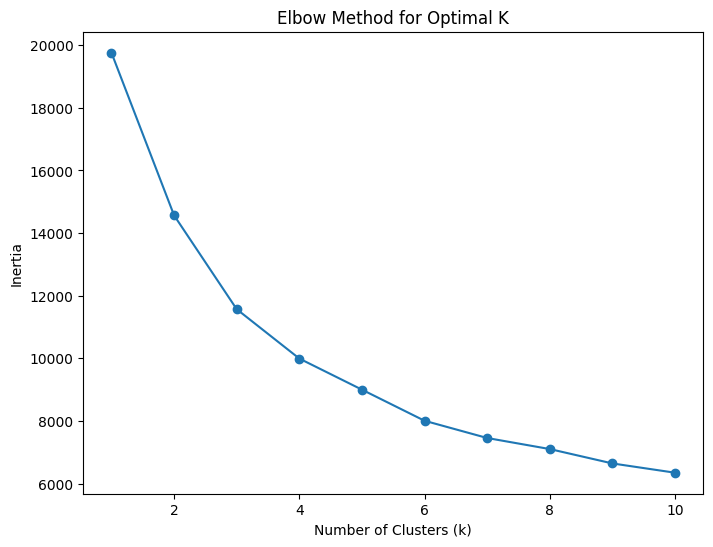

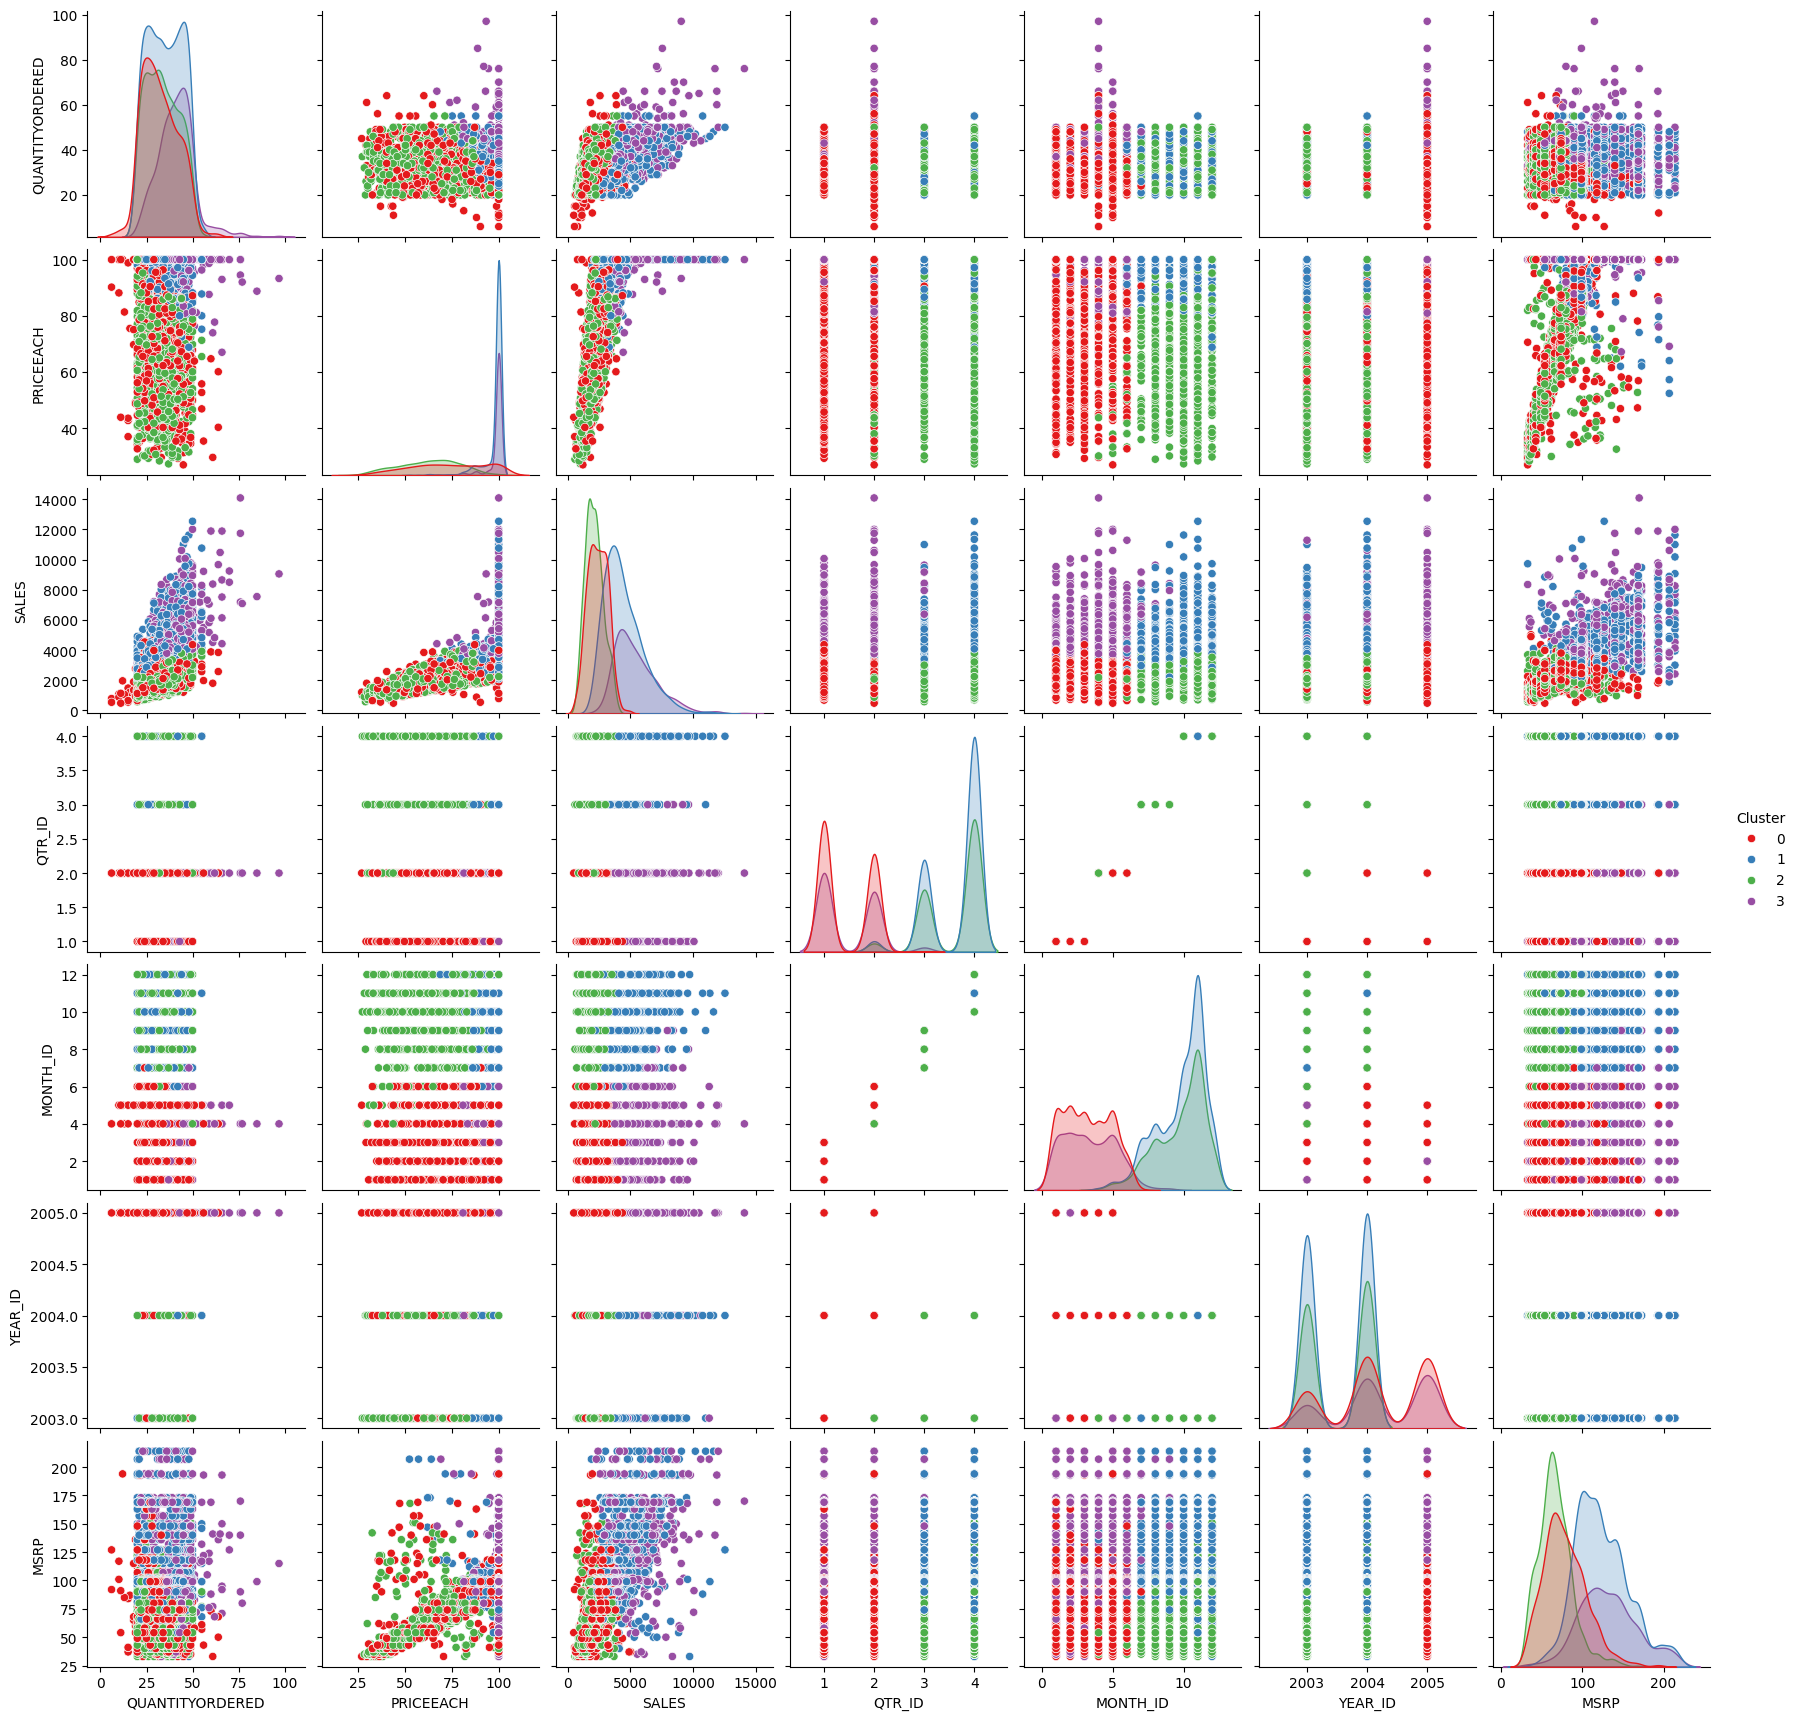

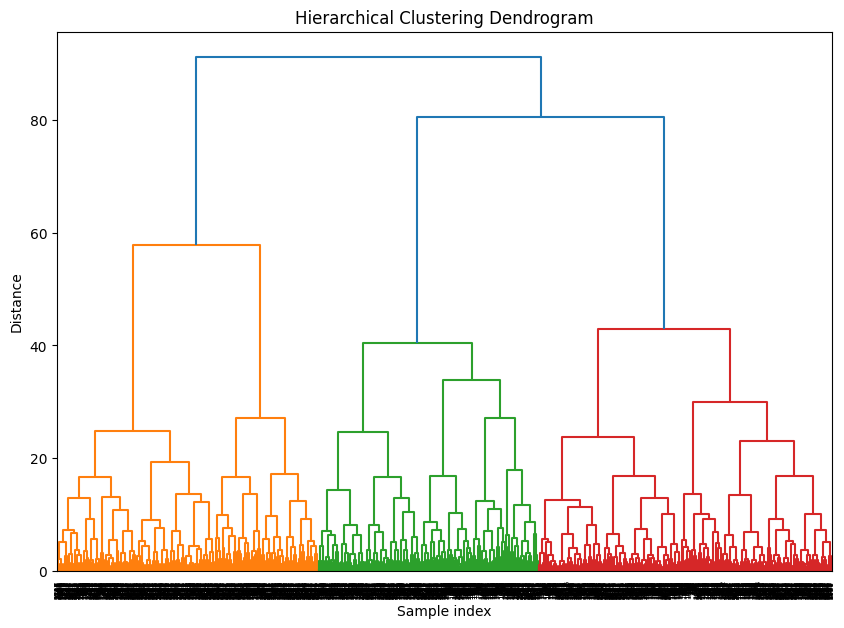

In [2]:
# Practical 9 : Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r"C:/Users/abc/Downloads/archive/sales_data_sample.csv", encoding='ISO-8859-1')
print(df.head())
print("\nMissing values in the dataset:\n", df.isnull().sum())

df_cleaned = df.drop(['ORDERNUMBER', 'ORDERLINENUMBER', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 
                      'CITY', 'STATE', 'POSTALCODE', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'], axis=1)

print("\nCleaned dataset:\n", df_cleaned.head())

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned.select_dtypes(include=[np.number]))

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(df_scaled)
df_cleaned['Cluster'] = kmeans.labels_

sns.pairplot(df_cleaned, hue="Cluster", palette="Set1")
plt.show()

Z = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

In [ ]:
# 10. Mini Project

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv(r"C:/Users/abc/Downloads/archive/titanic.csv")

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Split the data into features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8045
Confusion Matrix:
[[90 15]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

